A texas barbecue company receives in sales \\$34 per pound of brisket and \\$30 per pound of ribs.  The cost per unit to prepare each pound of brisket and ribs are \\$5 and \\$4 respectively.  The monthly (30 day) cost must not exceed \\$27,000 per month.  If the preparation takes 5 minutes to produce a pound of brisket and 15 minutes to produce a pound of ribs, how many pounds of brisket and ribs should the company make to maximize profit?  Determine the maximum profit the company earns in a 30 day period.  

S = 34B + 30R
5B + 4R <= 27000
5B + 15R <= 43200

In [32]:
30*24*60

43200

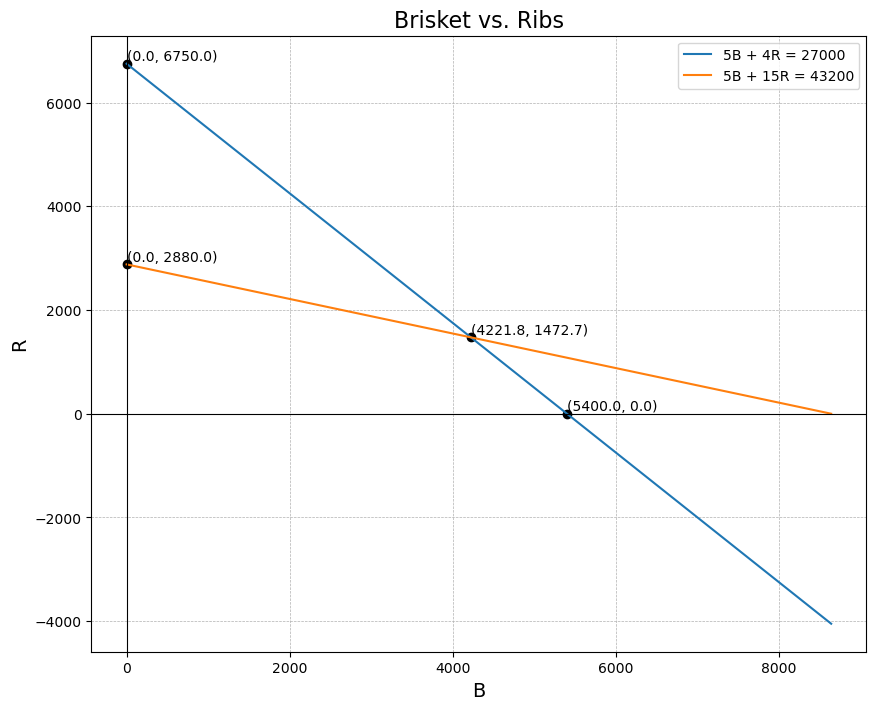

In [6]:
# Coefficients of the equations
coeff_B1, coeff_R1, constant1 = 5, 4, 27000  # 5B + 4R <= 27000
coeff_B2, coeff_R2, constant2 = 5, 15, 43200  # 5B + 15R <= 43200

# Finding intercepts for the first inequality
B_intercept1 = constant1 / coeff_B1
R_intercept1 = constant1 / coeff_R1

# Finding intercepts for the second inequality
B_intercept2 = constant2 / coeff_B2
R_intercept2 = constant2 / coeff_R2

# Defining the corner points
corner_points = [
    (0, R_intercept2),  # Intersection with R-axis for the second inequality
    (0, R_intercept1),  # Intersection with R-axis for the first inequality
    (B_intercept1, 0),  # Intersection with B-axis for the first inequality
]

# Adding intersection point of the two lines
from sympy import symbols, Eq, solve
B, R = symbols('B R')
eq1 = Eq(coeff_B1 * B + coeff_R1 * R, constant1)
eq2 = Eq(coeff_B2 * B + coeff_R2 * R, constant2)
intersection = solve((eq1, eq2), (B, R))
corner_points.append((intersection[B], intersection[R]))

# Sort points for shading the feasible region
corner_points = sorted(corner_points, key=lambda point: (point[0], point[1]))

# Visualization
import matplotlib.pyplot as plt
import numpy as np

# Generate values for the lines
B_values = np.linspace(0, max(B_intercept1, B_intercept2), 100)
R_values1 = (constant1 - coeff_B1 * B_values) / coeff_R1
R_values2 = (constant2 - coeff_B2 * B_values) / coeff_R2

# Plot
plt.figure(figsize=(10, 8))
plt.plot(B_values, R_values1, label=f"5B + 4R = {constant1}")
plt.plot(B_values, R_values2, label=f"5B + 15R = {constant2}")

# Annotate the corner points
for x, y in corner_points:
    plt.scatter(x, y, color='black')
    plt.text(x, y, f"({x:.1f}, {y:.1f})", fontsize=10, ha='left', va='bottom')

# Formatting the plot
plt.xlabel("B", fontsize=14)
plt.ylabel("R", fontsize=14)
plt.title("Brisket vs. Ribs", fontsize=16)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [8]:
from sympy import symbols, Eq, solve

# Define the variables
B, R = symbols('B R')

# Define the equations
eq1 = Eq(5 * B + 4 * R, 27000)
eq2 = Eq(5 * B + 15 * R, 43200)

# Solve the system of equations
solution = solve((eq1, eq2), (B, R))

# Round the results to whole numbers
B_whole = round(solution[B])
R_whole = round(solution[R])

print(f"Whole Number Solution: B = {B_whole}, R = {R_whole}")

Whole Number Solution: B = 4222, R = 1473


In [10]:
import pandas as pd
from sympy import symbols, Eq, solve

# Define variables
B, R = symbols('B R')

# Define the inequalities as equalities to find corner points
eq1 = Eq(5 * B + 4 * R, 27000)
eq2 = Eq(5 * B + 15 * R, 43200)

# Solve for corner points
corner1 = solve((Eq(5 * B + 4 * R, 27000), Eq(R, 0)), (B, R))  # Intersection with R=0
corner2 = solve((Eq(5 * B + 4 * R, 27000), Eq(5 * B + 15 * R, 43200)), (B, R))  # Intersection of two lines
corner3 = solve((Eq(5 * B + 15 * R, 43200), Eq(B, 0)), (B, R))  # Intersection with B=0

# Convert to integers
corner_points = [
    (round(corner1[B]), round(corner1[R])),
    (round(corner2[B]), round(corner2[R])),
    (round(corner3[B]), round(corner3[R]))
]

# Compute sales for each corner point
sales = [34 * b + 30 * r for b, r in corner_points]

# Create a DataFrame
df = pd.DataFrame(corner_points, columns=['B', 'R'])
df['Sales'] = sales

# Display the table
print(df)

      B     R   Sales
0  5400     0  183600
1  4222  1473  187738
2     0  2880   86400


In [34]:
187738 - 27000

160738

In [36]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [38]:
from pulp import *

In [42]:
prob = LpProblem("Problem_1", LpMaximize)
x = LpVariable.dicts("x", [1, 2], lowBound = 0, cat = "Continuous")
print(x)
prob += 34*x[1] + 30*x[2]
print(prob)

{1: x_1, 2: x_2}
Problem_1:
MAXIMIZE
34*x_1 + 30*x_2 + 0
VARIABLES
x_1 Continuous
x_2 Continuous



In [44]:
prob += 5*x[1] + 4*x[2] <= 27000
prob += 5*x[1] + 15*x[2] <= 43200
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/timothypark/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/69094738aab54299b73e5e82de5f7b16-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/69094738aab54299b73e5e82de5f7b16-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 64 (2)
0  Obj -0 Dual inf 64 (2)
2  Obj 187723.64
Optimal - objective value 187723.64
Optimal objective 187723.6364 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (

1

In [46]:
status = prob.solve()
print(LpStatus[status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/timothypark/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/29cf679b2a93431287e80a68e90977f7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/5z/f5jycvmd0x58dvn1by8xk79h0000gn/T/29cf679b2a93431287e80a68e90977f7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 64 (2)
0  Obj -0 Dual inf 64 (2)
2  Obj 187723.64
Optimal - objective value 187723.64
Optimal objective 187723.6364 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (

In [48]:
for var in prob.variables():
    print(f"{var.name} = {var.varValue}")

x_1 = 4221.8182
x_2 = 1472.7273
